# Visualizing spatial data - Choropleths

* [Color](#A-note-on-color)
* [Classification](#Classification-Algorithms)

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import seaborn as sns
import contextily as ctx
import matplotlib.pyplot as plt

from pysal.viz import mapclassify
from pysal.viz.splot.mapping import vba_choropleth

/opt/conda/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


## Data

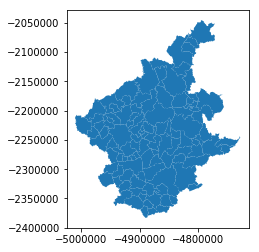

In [2]:
db = gpd.read_file('../data/bh.gpkg').to_crs(epsg=3857)
db.plot();

### A note on color

#### Sequential

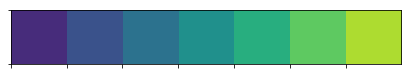

In [3]:
sns.palplot(sns.color_palette('viridis', 7))

#### Divergent

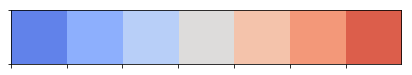

In [4]:
sns.palplot(sns.color_palette('coolwarm', 7))

#### Categorical

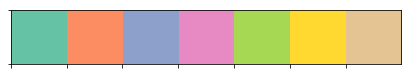

In [5]:
sns.palplot(sns.color_palette('Set2', 7))

### Classification Algorithms

#### Equal interval

In [6]:
classi = mapclassify.Equal_Interval(db['Average Monthly Wage'], k=7)
classi

               Equal Interval               
 
 Lower              Upper              Count
           x[i] <= 1384.173               57
1384.173 < x[i] <= 1788.726               28
1788.726 < x[i] <= 2193.279               11
2193.279 < x[i] <= 2597.831                4
2597.831 < x[i] <= 3002.384                3
3002.384 < x[i] <= 3406.937                1
3406.937 < x[i] <= 3811.490                1

In [7]:
classi.bins

array([1384.17285714, 1788.72571429, 2193.27857143, 2597.83142857,
       3002.38428571, 3406.93714286, 3811.49      ])

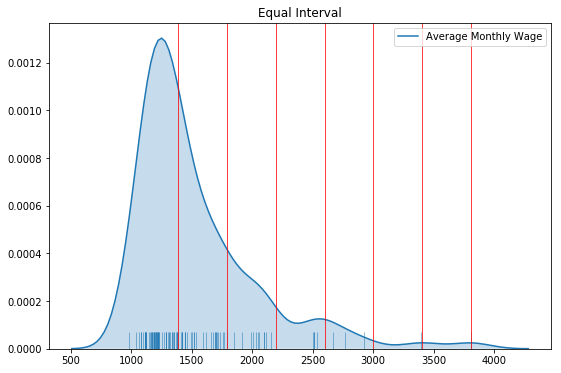

In [8]:
# Set up the figure
f, ax = plt.subplots(1, figsize=(9, 6))
# Plot the kernel density estimation (KDE)
sns.kdeplot(db['Average Monthly Wage'], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(db['Average Monthly Wage'], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Title
ax.set_title(classi.name)
# Display image
plt.show()

#### Quantiles

In [9]:
classi = mapclassify.Quantiles(db['Average Monthly Wage'], k=7)
classi

                 Quantiles                  
 
 Lower              Upper              Count
           x[i] <= 1162.834               15
1162.834 < x[i] <= 1212.199               15
1212.199 < x[i] <= 1307.026               15
1307.026 < x[i] <= 1416.074               15
1416.074 < x[i] <= 1679.534               15
1679.534 < x[i] <= 2036.489               15
2036.489 < x[i] <= 3811.490               15

In [10]:
classi.bins

array([1162.83428571, 1212.19857143, 1307.02571429, 1416.07428571,
       1679.53428571, 2036.48857143, 3811.49      ])

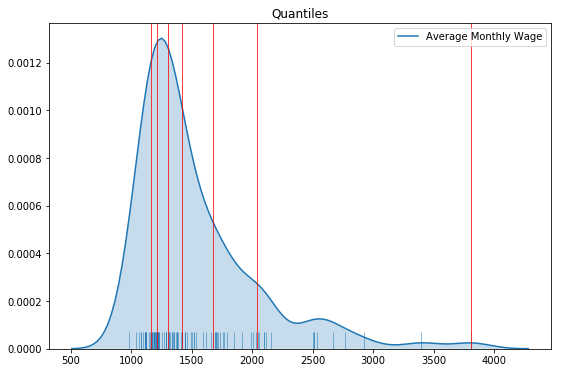

In [11]:
# Set up the figure
f, ax = plt.subplots(1, figsize=(9, 6))
# Plot the kernel density estimation (KDE)
sns.kdeplot(db['Average Monthly Wage'], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(db['Average Monthly Wage'], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Title
ax.set_title(classi.name)
# Display image
plt.show()

#### Other

* Fisher-Jenks

In [12]:
classi = mapclassify.Fisher_Jenks(db['Average Monthly Wage'], k=7)
classi

                Fisher_Jenks                
 
 Lower              Upper              Count
           x[i] <= 1152.240               15
1152.240 < x[i] <= 1311.040               32
1311.040 < x[i] <= 1534.290               24
1534.290 < x[i] <= 1852.820               15
1852.820 < x[i] <= 2152.780               10
2152.780 < x[i] <= 2922.820                7
2922.820 < x[i] <= 3811.490                2

In [13]:
classi.bins

array([1152.24, 1311.04, 1534.29, 1852.82, 2152.78, 2922.82, 3811.49])

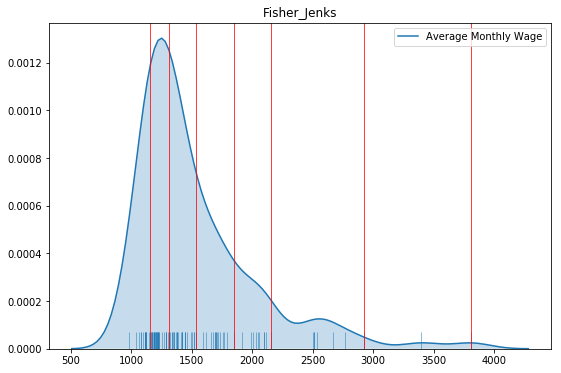

In [14]:
# Set up the figure
f, ax = plt.subplots(1, figsize=(9, 6))
# Plot the kernel density estimation (KDE)
sns.kdeplot(db['Average Monthly Wage'], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(db['Average Monthly Wage'], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Title
ax.set_title(classi.name)
# Display image
plt.show()

* Box-Plot

In [15]:
classi = mapclassify.Box_Plot(db['Average Monthly Wage'])
classi

                  Box Plot                  
 
 Lower              Upper              Count
           x[i] <=  436.680                0
 436.680 < x[i] <= 1197.330               27
1197.330 < x[i] <= 1353.740               26
1353.740 < x[i] <= 1704.430               26
1704.430 < x[i] <= 2465.080               17
2465.080 < x[i] <= 3811.490                9

In [16]:
classi.bins

array([ 436.68, 1197.33, 1353.74, 1704.43, 2465.08, 3811.49])

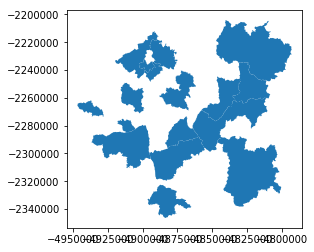

In [17]:
db.assign(yb=classi.yb).query('(yb == 0) | (yb == 4)').plot()

In [18]:
classi.yb

array([2, 2, 2, 3, 4, 3, 5, 3, 5, 1, 1, 4, 1, 2, 3, 1, 1, 3, 1, 5, 5, 4,
       1, 3, 4, 1, 1, 2, 2, 1, 1, 2, 2, 3, 1, 2, 1, 2, 3, 3, 2, 4, 4, 2,
       2, 5, 1, 2, 5, 1, 3, 4, 4, 1, 4, 2, 3, 3, 2, 3, 3, 5, 1, 3, 5, 5,
       1, 3, 1, 3, 4, 1, 2, 2, 3, 3, 3, 3, 4, 2, 3, 1, 4, 4, 3, 1, 1, 2,
       2, 1, 2, 3, 2, 4, 3, 4, 1, 1, 2, 4, 1, 2, 3, 2, 4])

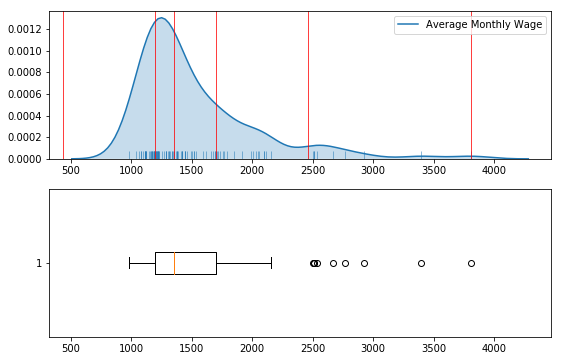

In [19]:
# Set up the figure
f, axs = plt.subplots(2, figsize=(9, 6))
# Plot the kernel density estimation (KDE)
sns.kdeplot(db['Average Monthly Wage'], shade=True, ax=axs[0])
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(db['Average Monthly Wage'], alpha=0.5, ax=axs[0])
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    axs[0].axvline(cut, color='red', linewidth=0.75)
# Box-Plot
axs[1].boxplot(db['Average Monthly Wage'], vert=False)
# Set X axis manually
axs[1].set_xlim(axs[0].get_xlim())
# Title
ax.set_title(classi.name)
# Display image
plt.show()

### Choropleths

* Equal Interval

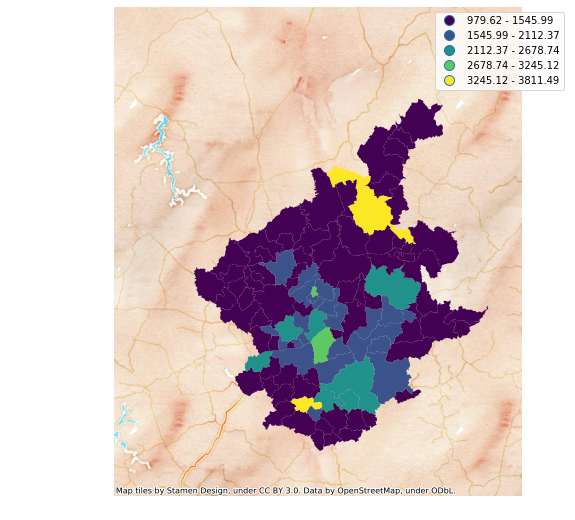

In [20]:
f, ax = plt.subplots(1, figsize=(9, 9))
db.plot(column='Average Monthly Wage', scheme='equal_interval', 
        ax=ax, legend=True)
ctx.add_basemap(ax, url=ctx.sources.ST_WATERCOLOR)
ax.set_axis_off()
plt.axis('equal')
plt.show()

* Quantiles

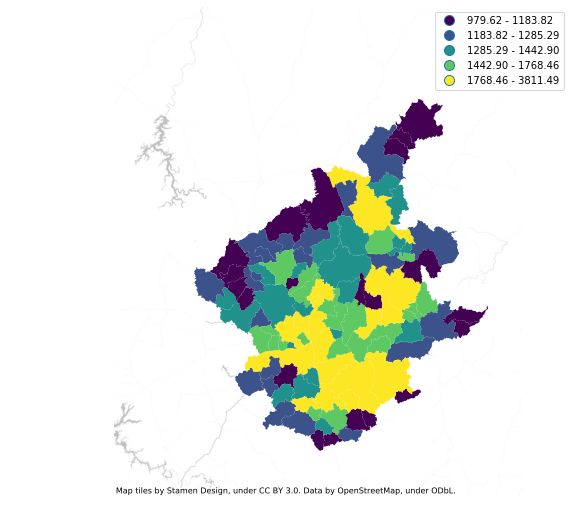

In [21]:
f, ax = plt.subplots(1, figsize=(9, 9))
db.plot(column='Average Monthly Wage', scheme='quantiles', 
        ax=ax, legend=True)
ctx.add_basemap(ax, url=ctx.sources.ST_TONER_BACKGROUND,
                alpha=0.25)
ax.set_axis_off()
plt.axis('equal')
plt.show()

* Fisher-Jenks

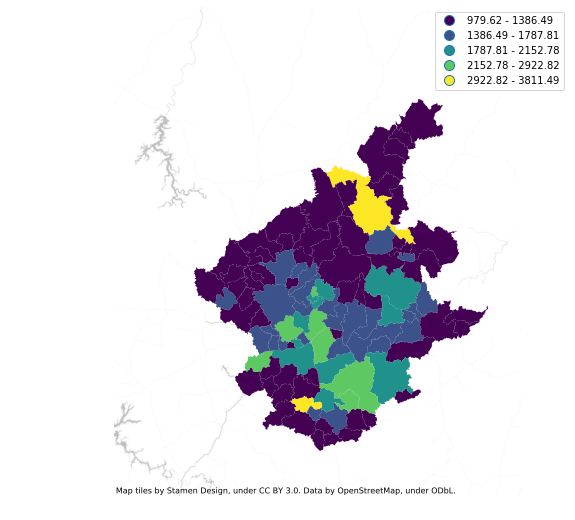

In [22]:
f, ax = plt.subplots(1, figsize=(9, 9))
db.plot(column='Average Monthly Wage', scheme='fisher_jenks', 
        ax=ax, legend=True)
ctx.add_basemap(ax, url=ctx.sources.ST_TONER_BACKGROUND,
                alpha=0.25)
ax.set_axis_off()
plt.axis('equal')
plt.show()

* Box-Plot (Divergent)

**NOTE**: different to code!

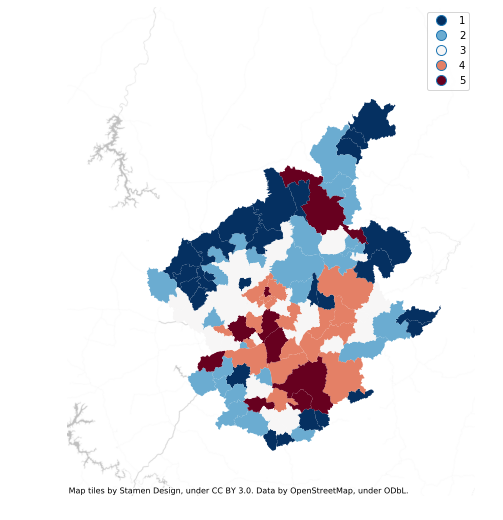

In [23]:
bp = mapclassify.Box_Plot(db['Average Monthly Wage'])

f, ax = plt.subplots(1, figsize=(9, 9))
db.assign(classes=bp.yb)\
  .plot(column='classes', categorical=True, 
        ax=ax, legend=True, cmap='RdBu_r')
ctx.add_basemap(ax, url=ctx.sources.ST_TONER_BACKGROUND,
                alpha=0.25)
ax.set_axis_off()

plt.show()

* Unique values

In [24]:
central = ['3106200', '3110004', '3117876', '3118601', '3129806', '3134608',
           '3137601', '3141108', '3144805', '3149309', '3153905', '3154606',
           '3154804', '3156700', '3157807', '3162955', '3168309', '3171204']
centre = pd.Series('Periphery', index=db.index)
centre[db['CD_GEOCMU'].isin(central)] = 'Centre'
centre.head()

0    Periphery
1    Periphery
2    Periphery
3    Periphery
4    Periphery
dtype: object

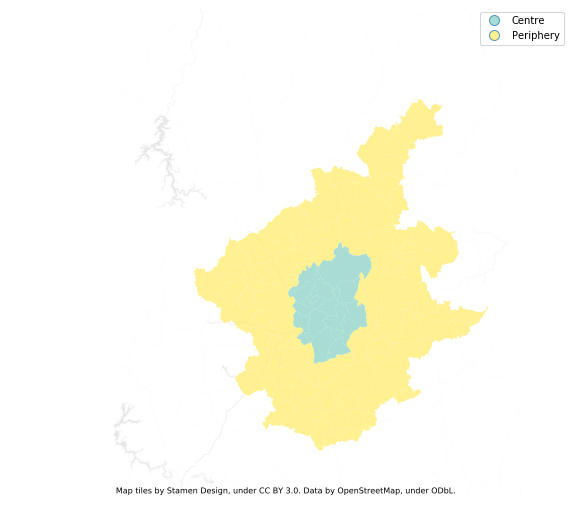

In [25]:
f, ax = plt.subplots(1, figsize=(9, 9))
db.assign(centre=centre)\
  .plot(column='centre', categorical=True, 
        ax=ax, legend=True, cmap='Set3',
        alpha=0.75)
ctx.add_basemap(ax, url=ctx.sources.ST_TONER_BACKGROUND,
                alpha=0.1)
ax.set_axis_off()
plt.axis('equal')
plt.show()

---

**EXERCISE**

Replicate the analysis above using the industry diversity and explore the effect that different algorithms have on the resulting maps.

---

### Value by Alpha

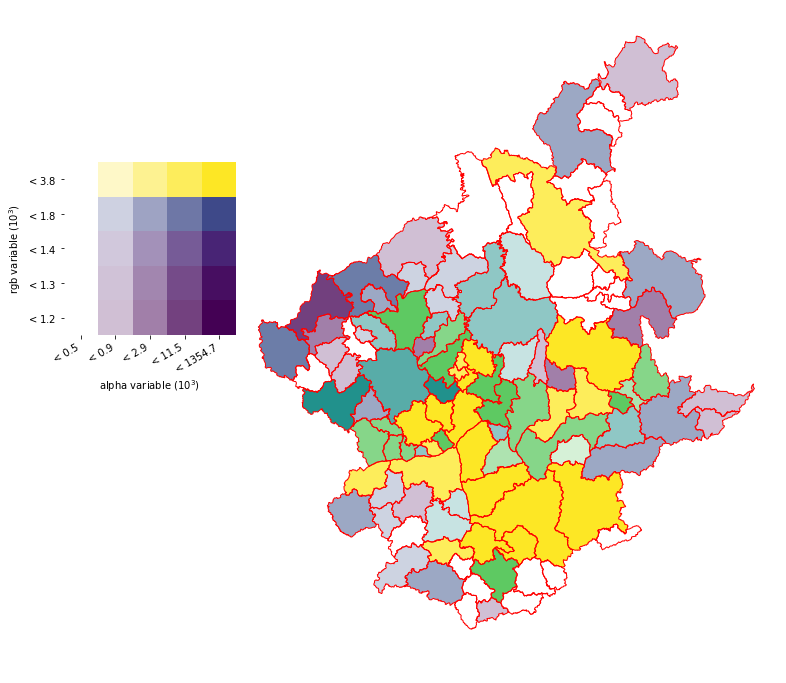

In [26]:
f, ax = plt.subplots(1, figsize=(12, 12))
vba_choropleth(db['Average Monthly Wage'], db['Total Jobs'], db,
                alpha_mapclassify=dict(classifier='quantiles', k=5),
                rgb_mapclassify=dict(classifier='quantiles', k=5),
                legend=True, cmap='viridis', ax=ax)
db.plot(ax=ax, facecolor='none', edgecolor='red')
ax.set_title('')
plt.show()

---


<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Geographic Data Science with Python - UFMG'19</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/darribas/gds_ufmg19" property="cc:attributionName" rel="cc:attributionURL">Dani Arribas-Bel</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.
